In [1]:
%matplotlib notebook
from imp import reload  # Python 3.0 - 3.3
       
from matplotlib import pyplot as plt
from matplotlib import rc
# rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table

import pycocosn as pcc

<IPython.core.display.Javascript object>


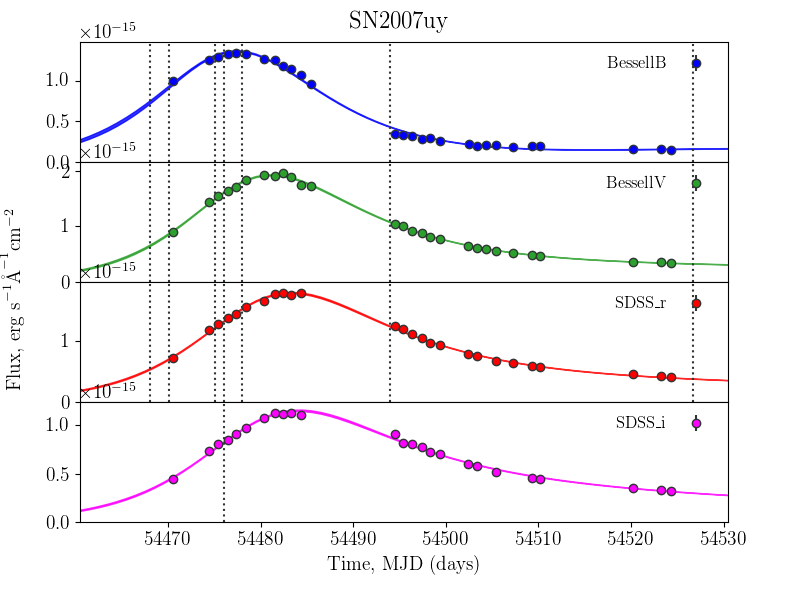

In [2]:
snname = "SN2007uy"

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))

sn.load_spec()
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.check_overlaps()

sn.plot_lc(xextent=60, showsnname=True)

<IPython.core.display.Javascript object>


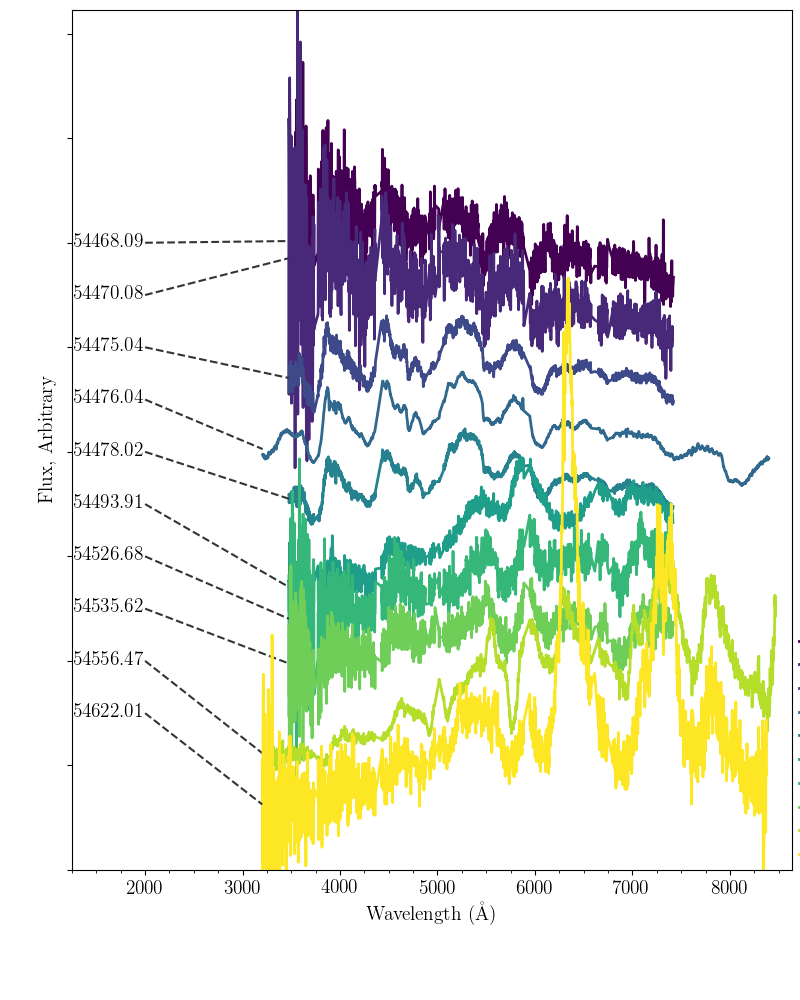

In [3]:
sn.plot_spec()

In [4]:
for j in zip(sn.spec, [sn.spec[i].mjd_obs for i in sn.spec]):
    print(j)

('2007uy_-13.01.txt', 54468.089999999997)
('2007uy_-11.02.txt', 54470.080000000002)
('2007uy_-6.06.txt', 54475.040000000001)
('2007uy_-5.06.txt', 54476.040000000001)
('2007uy_-3.08.txt', 54478.019999999997)
('2007uy_12.81.txt', 54493.910000000003)
('2007uy_45.58.txt', 54526.68)
('2007uy_54.52.txt', 54535.620000000003)
('2007uy_75.37.txt', 54556.470000000001)
('2007uy_140.91.txt', 54622.010000000002)


In [5]:
spec = sn.spec["2007uy_-5.06.txt"]

In [6]:
sn.phot.data_filters

OrderedDict([('BessellB', <pycoco.classes.FilterClass at 0x10dae4240>),
             ('BessellV', <pycoco.classes.FilterClass at 0x10db02588>),
             ('SDSS_r', <pycoco.classes.FilterClass at 0x10dc0ec18>),
             ('SDSS_i', <pycoco.classes.FilterClass at 0x10daeaf60>)])

In [7]:
filter_name = "BessellB"
S = sn.spec["2007uy_-5.06.txt"]

for i, filter_name in enumerate(sn.phot.data_filters):
    flux = pcc.kcorr.calc_spectrum_filter_flux(filter_object=sn.phot.data_filters[filter_name], spectrum_object=S)
    print(flux)
    if i == 0:
        S.specphot = Table(names = ("lambda_effective", "flux", "filter"), dtype=('f4', 'f4', 'S'))

    S.specphot.add_row((sn.phot.data_filters[filter_name].lambda_effective, flux, filter_name))
    

Filter_area =  958.905389226
Integrated flux =  1.25909260411e-14
1.31305196348e-17
Filter_area =  893.09534922
Integrated flux =  1.3248860846e-14
1.48347663635e-17
Filter_area =  1108.16294901
Integrated flux =  1.31211171171e-14
1.18404221408e-17
Filter_area =  1097.45661135
Integrated flux =  8.54903671189e-15
7.78986305562e-18


<IPython.core.display.Javascript object>


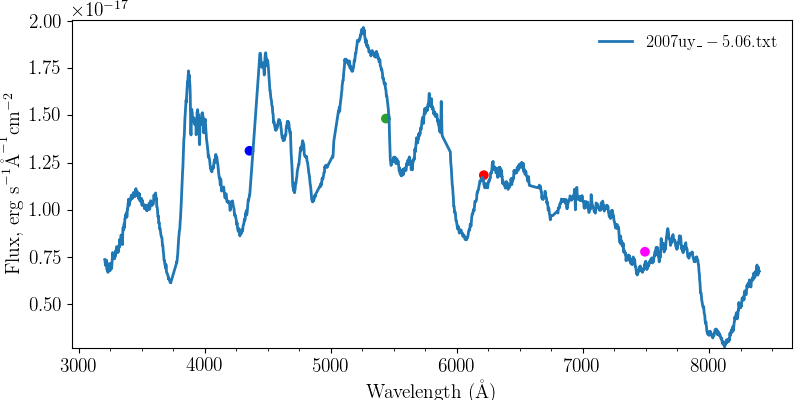

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [8]:
fig = sn.spec["2007uy_-5.06.txt"].plot(return_figure = True)

ax = fig.add_subplot(111)

ax.scatter(S.specphot["lambda_effective"], S.specphot["flux"], c = [sn.phot.data_filters[f]._plot_colour for f in sn.phot.data_filters])

In [9]:
S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,1.31305e-17,BessellB
5436.87,1.48348e-17,BessellV
6213.67,1.18404e-17,SDSS_r
7491.96,7.78986e-18,SDSS_i


# Extension Using a Black Body
___

In [10]:
from astropy.modeling import blackbody as bb
from astropy.table import Table, Column, Row
from astropy import units as u

In [11]:
bb.blackbody_lambda

<function astropy.modeling.blackbody.blackbody_lambda>

<IPython.core.display.Javascript object>


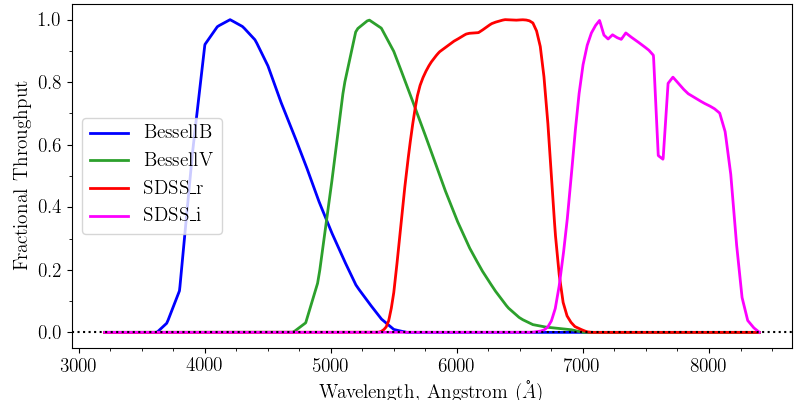

In [12]:
sn.plot_filters()

In [13]:
filter_name = "SDSS_i"
new_max_wavelength = 9500
wav_interval = 1.0

orig_wavelength = sn.phot.data_filters[filter_name].wavelength
extend_wavelength = np.append(np.arange(orig_wavelength[-1]+1.0, new_max_wavelength, wav_interval), new_max_wavelength)

In [14]:
bb_flux = bb.blackbody_lambda(np.array(orig_wavelength)*u.AA, temperature=10000*u.Kelvin)

dt_blackbody = Table([orig_wavelength, bb_flux], names=("wavelength", "flux"))

In [15]:
bb_S = pcc.classes.SpectrumClass()

In [16]:
bb_S.load_table(dt_blackbody)

<IPython.core.display.Javascript object>


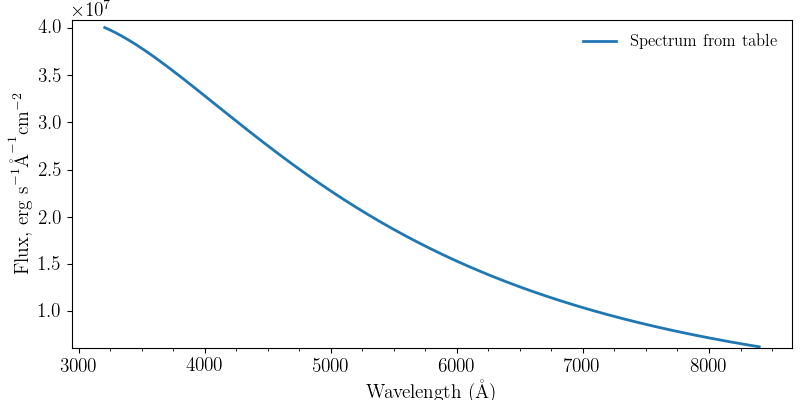

In [17]:
bb_S.plot()

In [18]:
# type(sn.phot.data_filters)
bb_S.check_overlaps(sn.phot.data_filters, verbose = True)

0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True


In [19]:
bb_S._overlapping_filter_list

array(['BessellB', 'BessellV', 'SDSS_r', 'SDSS_i'],
      dtype='<U8')

In [20]:
bb_S.get_specphot(sn.phot.data_filters, verbose = True)

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  28514915.9343
1 BessellV
flux in filter BessellV  is  18762067.6354
2 SDSS_r
flux in filter SDSS_r  is  14371586.0993
3 SDSS_i
flux in filter SDSS_i  is  8717790.12859


In [21]:
bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,2.85149e+07,BessellB
5436.87,1.87621e+07,BessellV
6213.67,1.43716e+07,SDSS_r
7491.96,8.71779e+06,SDSS_i


<IPython.core.display.Javascript object>


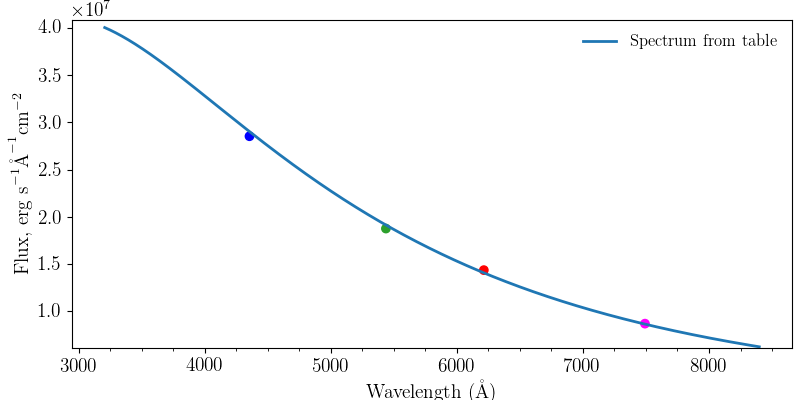

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [22]:
fig = bb_S.plot(return_figure=True)

ax1 = fig.add_subplot(111)
ax1.scatter(bb_S.specphot["lambda_effective"], bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters])


In [23]:
red_bb_S = pcc.classes.SpectrumClass()
red_bb_S.load_table(dt_blackbody)
red_bb_S.check_overlaps(sn.phot.data_filters)

red_bb_S.flux = pcc.extinction.unred(red_bb_S.wavelength, red_bb_S.flux, EBV=-0.2)

red_bb_S.get_specphot(sn.phot.data_filters, verbose = True)

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  13322265.6343
1 BessellV
flux in filter BessellV  is  10522854.559
2 SDSS_r
flux in filter SDSS_r  is  8670726.049
3 SDSS_i
flux in filter SDSS_i  is  5914124.89592


<IPython.core.display.Javascript object>


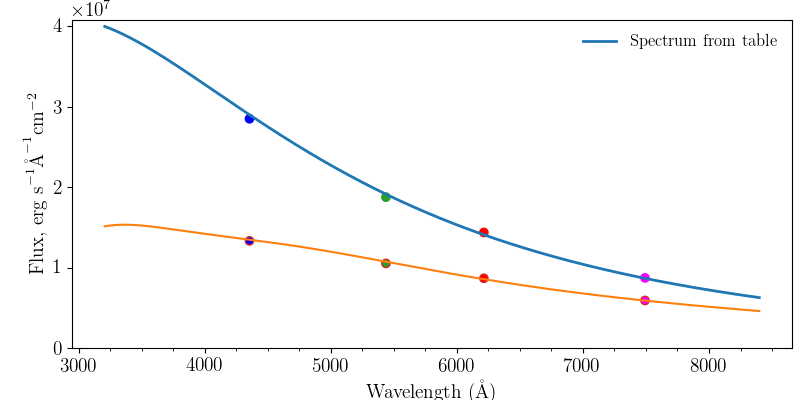

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.0, 40795331.11614605)

In [24]:
fig = bb_S.plot(return_figure=True)

ax1 = fig.add_subplot(111)
ax1.scatter(bb_S.specphot["lambda_effective"], bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters])

ax1.plot(red_bb_S.wavelength, red_bb_S.flux, color = "C1")
ax1.scatter(red_bb_S.specphot["lambda_effective"], red_bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters], edgecolors="C3")

ax1.set_ylim(0.0, ax1.get_ylim()[1])

In [25]:
red_bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,1.33223e+07,BessellB
5436.87,1.05229e+07,BessellV
6213.67,8.67073e+06,SDSS_r
7491.96,5.91412e+06,SDSS_i


In [26]:
bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,2.85149e+07,BessellB
5436.87,1.87621e+07,BessellV
6213.67,1.43716e+07,SDSS_r
7491.96,8.71779e+06,SDSS_i


In [27]:
flux_scale = red_bb_S.specphot["flux"][np.where(red_bb_S.specphot["filter"] == "SDSS_i")] / S.specphot["flux"][np.where(S.specphot["filter"] == "SDSS_i")]

In [28]:
red_bb_S.data["flux"] = red_bb_S.data["flux"] / flux_scale
red_bb_S.flux = red_bb_S.flux / flux_scale

In [29]:
red_bb_S.get_specphot(sn.phot.data_filters, verbose = True)

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.75475875231e-17
1 BessellV
flux in filter BessellV  is  1.38603084817e-17
2 SDSS_r
flux in filter SDSS_r  is  1.1420754428e-17
3 SDSS_i
flux in filter SDSS_i  is  7.78986300699e-18


<IPython.core.display.Javascript object>


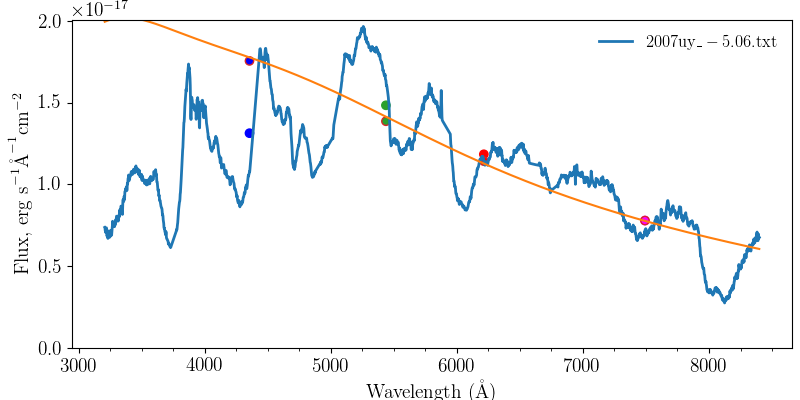

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.0, 2.00481e-17)

In [30]:
fig = sn.spec["2007uy_-5.06.txt"].plot(return_figure = True)

ax1 = fig.add_subplot(111)

ax1.scatter(S.specphot["lambda_effective"], S.specphot["flux"], c = [sn.phot.data_filters[f]._plot_colour for f in sn.phot.data_filters])

ax1.plot(red_bb_S.wavelength, red_bb_S.flux, color = "C1")
ax1.scatter(red_bb_S.specphot["lambda_effective"], red_bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters], edgecolors="C3")

ax1.set_ylim(0.0, ax1.get_ylim()[1])

In [31]:
# specphot
# specphot_bb

In [32]:
from lmfit import minimize, Parameters, fit_report

params = Parameters()
params.add("T", value=10000) ## BB temp
params.add("flux_scale", value=1e23) ## Flux Scaling
params.add("EBV", value=0.0) ## Extinction

# specphot, T, EBV, flux_scale, filters
def bb_min(params, specphot, filters, wavelength, verbose=False):
    
    T = params["T"]
    flux_scale = params["flux_scale"]
    EBV = params["EBV"]
    
    bb_flux = bb.blackbody_lambda(np.array(wavelength)*u.AA, temperature=T*u.Kelvin)

    bb_spec = pcc.classes.SpectrumClass()
    bb_spec.load_table(Table([wavelength, bb_flux], names=("wavelength", "flux")))
  
    bb_spec.flux = pcc.extinction.unred(bb_spec.wavelength, bb_spec.flux, EBV=EBV)

    bb_spec.data["flux"] = bb_spec.data["flux"] / flux_scale
    bb_spec.flux = bb_spec.flux / flux_scale

    bb_spec.get_specphot(filters, verbose = verbose)

    residual = specphot["flux"] - bb_spec.specphot["flux"]

#     return np.sum((residual)**2)
    return residual

def bb_min_fun(params, specphot, filters, wavelength, verbose=False):
    
    T = params["T"]
    flux_scale = params["flux_scale"]
    EBV = params["EBV"]
    
    bb_flux = bb.blackbody_lambda(np.array(wavelength)*u.AA, temperature=T*u.Kelvin)

    bb_spec = pcc.classes.SpectrumClass()
    bb_spec.load_table(Table([wavelength, bb_flux], names=("wavelength", "flux")))
    
    bb_spec.flux = pcc.extinction.unred(bb_spec.wavelength, bb_spec.flux, EBV=EBV)

    bb_spec.data["flux"] = bb_spec.data["flux"] / flux_scale
    bb_spec.flux = bb_spec.flux / flux_scale

    bb_spec.get_specphot(filters, verbose = verbose)

    return bb_spec

In [33]:
out = minimize(bb_min, params, args=(S.specphot, sn.phot.data_filters, orig_wavelength), kws = ({"verbose": False}))

In [34]:
print(fit_report(out))

paramlist = np.array([out.params[key].value for key in out.params.keys()])

[[Fit Statistics]]
    # function evals   = 67
    # data points      = 4
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -325.182
    Bayesian info crit = -327.023
[[Variables]]
    T:            4972.76564 +/- 2.18e+04 (438.02%) (init= 10000)
    flux_scale:   2.1437e+23 +/- 1.06e+24 (494.19%) (init= 1e+23)
    EBV:          0.29279807 +/- 6.371343 (2176.02%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(T, EBV)                    = -1.000 
    C(T, flux_scale)             =  0.997 
    C(flux_scale, EBV)           = -0.995 


In [35]:
# best_bb = bb_min_fun(out.params, S.specphot, sn.phot.data_filters, S.wavelength)
best_bb = bb_min_fun(out.params, S.specphot, sn.phot.data_filters, Column(np.arange(2000, 10000)*u.Angstrom))

<IPython.core.display.Javascript object>


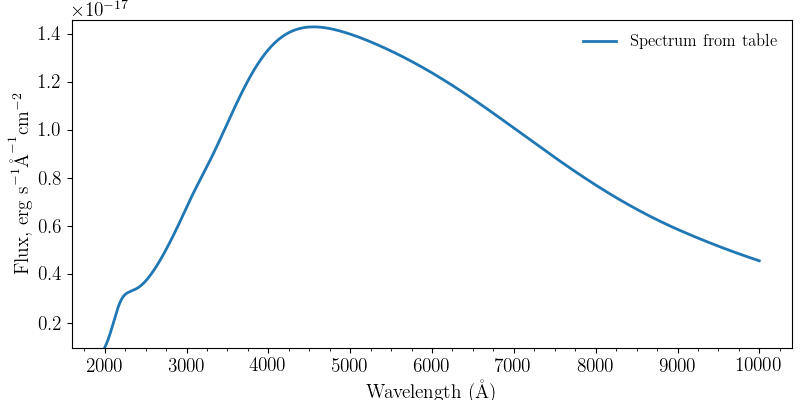

In [36]:
best_bb.plot()

<IPython.core.display.Javascript object>


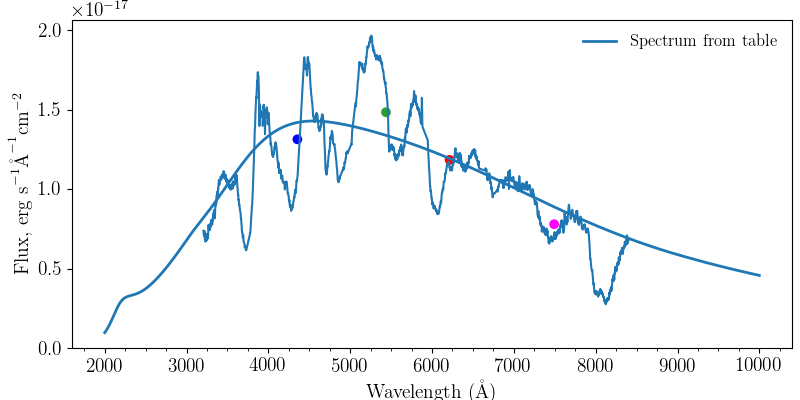

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.0, 2.0637749999999999e-17)

In [37]:
fig = best_bb.plot(return_figure=True)


ax = fig.add_subplot(111)
ax.plot(S.wavelength, S.flux)
ax.scatter(S.specphot["lambda_effective"], S.specphot["flux"], c = [sn.phot.data_filters[f]._plot_colour for f in sn.phot.data_filters])

ax.set_ylim(0., 1.05*np.nanmax(S.flux))

In [38]:
w_blue = np.where(best_bb.wavelength < np.nanmin(S.wavelength))
w_red = np.where(best_bb.wavelength > np.nanmax(S.wavelength))

In [39]:
new_flux = np.append(best_bb.flux[w_blue], np.append(S.flux, best_bb.flux[w_red]))
new_wavelength = np.append(best_bb.wavelength[w_blue], np.append(S.wavelength, best_bb.wavelength[w_red]))


In [40]:
new_spectrum = pcc.classes.SpectrumClass()
new_spectrum.load_table(Table([new_wavelength, new_flux], names=("wavelength", "flux")))

<IPython.core.display.Javascript object>


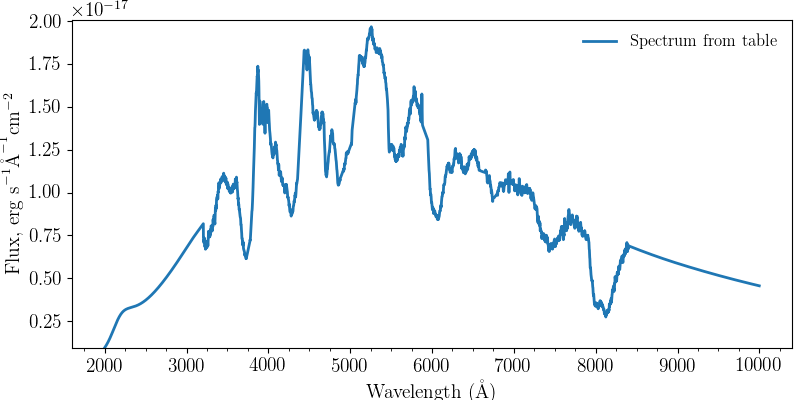

In [41]:
new_spectrum.plot()

In [42]:
sn.phot.data_filters

OrderedDict([('BessellB', <pycoco.classes.FilterClass at 0x10dae4240>),
             ('BessellV', <pycoco.classes.FilterClass at 0x10db02588>),
             ('SDSS_r', <pycoco.classes.FilterClass at 0x10dc0ec18>),
             ('SDSS_i', <pycoco.classes.FilterClass at 0x10daeaf60>)])

In [43]:
pcc.kcorr.fit_bb(S, filter_dict=sn.phot.data_filters, return_table=True, verbose=True)

<class 'astropy.units.core.Unit'>
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  2.8514910543

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.10508057919e-16
1 BessellV
flux in filter Be

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.61441983032e-17
1 BessellV
flux in filter Be

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.38795381908e-17
1 BessellV
flux in filter Be

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.38940703213e-17
1 BessellV
flux in filter Be

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.38876771128e-17
1 BessellV
flux in filter Be

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.39862353849e-17
1 BessellV
flux in filter Be

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.39725697164e-17
1 BessellV
flux in filter Be

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.38953602615e-17
1 BessellV
flux in filter Be

<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 <pycoco.classes.FilterClass object at 0x10dae4240>
True
1 <pycoco.classes.FilterClass object at 0x10db02588>
True
2 <pycoco.classes.FilterClass object at 0x10dc0ec18>
True
3 <pycoco.classes.FilterClass object at 0x10daeaf60>
True
<class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10dae4240>), ('BessellV', <pycoco.classes.FilterClass object at 0x10db02588>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10dc0ec18>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10daeaf60>)])
0 BessellB
flux in filter BessellB  is  1.38953886177e-17
1 BessellV
flux in filter Be

wavelength,flux
float64,float64
2000.0,9.56497521461e-19
2001.0,9.63518586594e-19
2002.0,9.70593949896e-19
2003.0,9.77723894113e-19
2004.0,9.84908697017e-19
2005.0,9.92148631174e-19
2006.0,9.99443963699e-19
2007.0,1.00679495601e-18
2008.0,1.01420186359e-18


In [44]:
new_spec = pcc.classes.SpectrumClass()

new_spec.load_table(pcc.kcorr.fit_bb(S, filter_dict=sn.phot.data_filters, return_table=True))

<IPython.core.display.Javascript object>


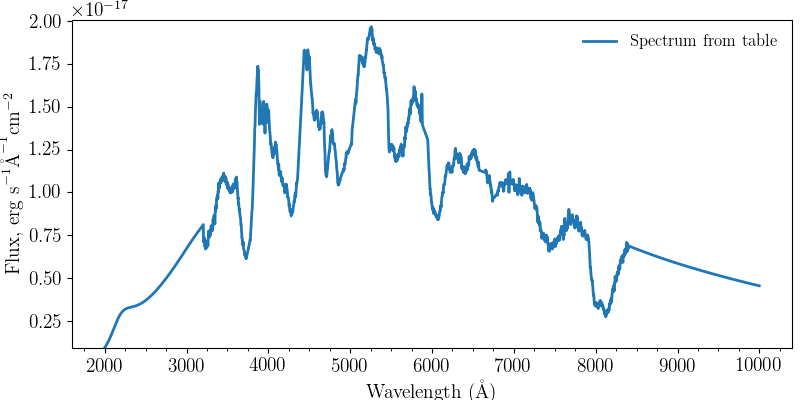

In [45]:
new_spec.plot()

## Testing
___

<IPython.core.display.Javascript object>


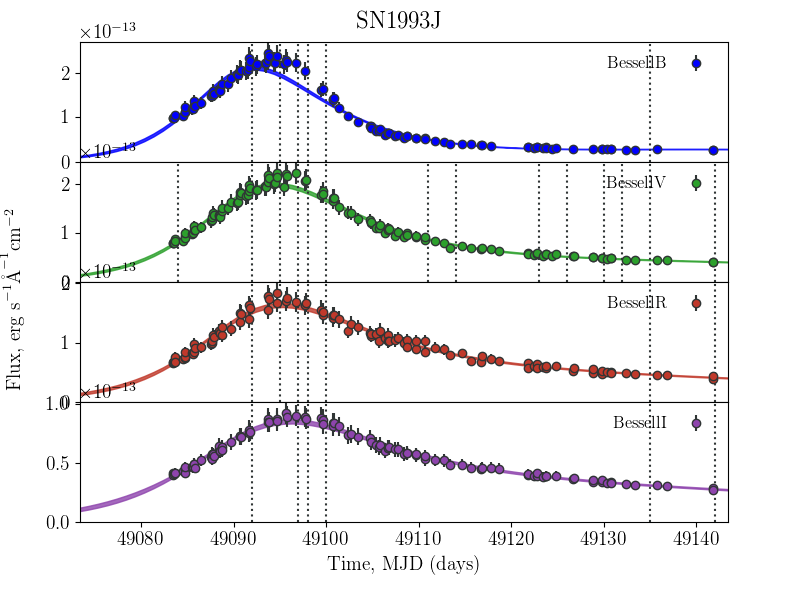

In [46]:
snname = "SN1993J"

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))

sn.load_spec()
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.check_overlaps()

sn.plot_lc(xextent=60, showsnname=True)

In [47]:
sn.spec["1993J_-11.0.txt"]._n_overlapping_filters

1

In [48]:
for i in [sn.spec["1993J_-11.0.txt"]._overlapping_filter_list]:
    print(i)

BessellV


# Extension with other Spectra
____

The use of a Black Body is not always a good choice. When the spectrum is nebular or absorption-line dominated for example. Even above, the spectrum is not a Black Body.

An alternative is to extend by using either a very simple model - a straight line for example, or a "donor" spectrum from a similar object.

In [84]:
snname = "SN1993J"

sn = pcc.classes.SNClass(snname)
sn.load_phot(path=os.path.join(pcc.defaults._default_data_dir_path, "lc/" + snname + ".dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, "SN1993J.list"))

sn.load_spec()
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.check_overlaps()

spec_key = "1993J_16.0.txt"

print(spec_key)
S = sn.spec[spec_key]
S.get_specphot(sn.phot.data_filters, verbose=True)

new_spec = pcc.classes.SpectrumClass()

# new_spec.load_table(pcc.kcorr.fit_bb(S, filter_dict=sn.phot.data_filters, return_table=True, verbose=True))

1993J_16.0.txt
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x1145250b8>), ('BessellV', <pycoco.classes.FilterClass object at 0x1145db8d0>), ('BessellR', <pycoco.classes.FilterClass object at 0x11467cf98>), ('BessellI', <pycoco.classes.FilterClass object at 0x113dffb70>)])
<class 'numpy.ndarray'> BessellV
only one overlapping filter
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x1145250b8>), ('BessellV', <pycoco.classes.FilterClass object at 0x1145db8d0>), ('BessellR', <pycoco.classes.FilterClass object at 0x11467cf98>), ('BessellI', <pycoco.classes.FilterClass object at 0x113dffb70>)])
0 BessellB
flux in filter BessellB  is  4.70761643928e-18
1 BessellV
flux in filter BessellV  is  1.34701076887e-17
2 BessellR
flux in filter BessellR  is  1.50849825505e-17
3 BessellI
flux in filter BessellI  is  1.7721602961e-20


<IPython.core.display.Javascript object>


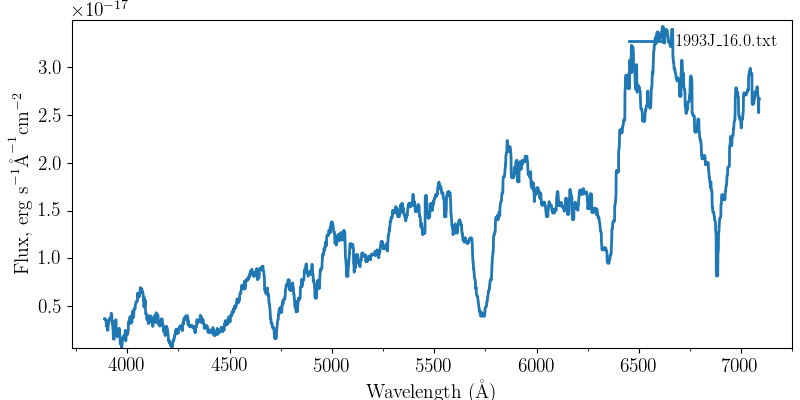

In [89]:
S.plot()

In [90]:
info = pcc.classes.InfoClass()
info.load()

In [105]:
donor_early = "SN2011dh/2011dh_-17.67.txt"
donor_peak = "SN2007Y/2007Y_-1.79.txt"
donor_late = "SN1999dn/1999dn_18.82.txt"

<IPython.core.display.Javascript object>


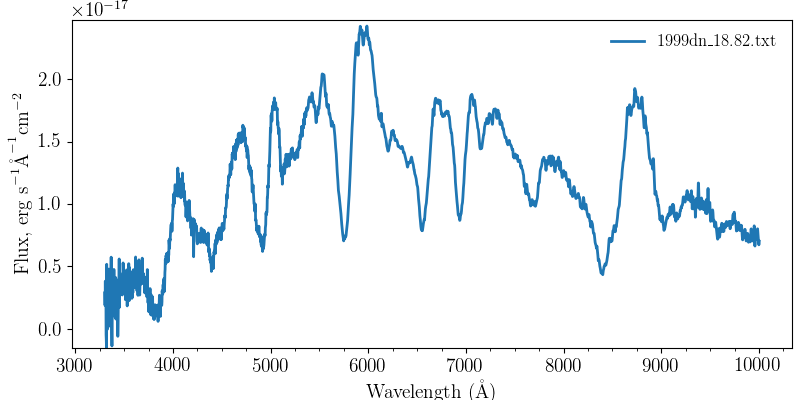

In [106]:
# donor = donor_peak
donor = donor_late
S_donor = pcc.classes.SpectrumClass()
S_donor.load(filename=donor, 
             directory=os.path.join(pcc.defaults._default_data_dir_path, "spec"))
S_donor.plot()

In [108]:
from astropy.table import Table, Column, vstack

wmax = np.nanmax(S.wavelength)
wmax_flux = S.flux[np.where(S.wavelength == wmax)][0]
print(wmax, wmax_flux)

red_spec_table = S_donor.data[np.where(S_donor.data["wavelength"] > wmax)]

donor_flux = red_spec_table["flux"][np.where(red_spec_table["wavelength"] == np.nanmin(red_spec_table["wavelength"]))][0]
print(donor_flux)

flux_scaling = wmax_flux/donor_flux
print(flux_scaling)

red_spec_table["flux"] = red_spec_table["flux"]*flux_scaling

combined_spec = pcc.classes.SpectrumClass()
combined_spec.load_table(vstack([S.data, red_spec_table]), path="")

7088.00113 2.6718e-17
1.83159e-17
1.45873257661


<IPython.core.display.Javascript object>


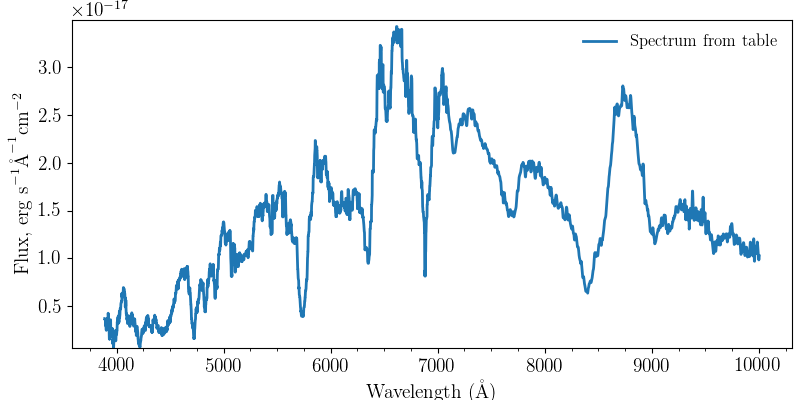

In [109]:
combined_spec.plot()

### Flat Linear Extension
____

In [ ]:
extension_wavelength = np.arange(np.nanmax(S.wavelength), new_max_wavelength ) * u.Angstrom
extension_flux = np.ones(len(extension_wavelength)) * np.mean(S.flux)

extension_spec = pcc.classes.SpectrumClass()
extension_spec.load_table(Table([extension_wavelength, extension_flux], names=("wavelength", "flux")))
extension_spec.plot()

In [ ]:
from astropy.table import vstack

In [ ]:
extended_spec = pcc.classes.SpectrumClass()
extended_spec.load_table(vstack([S.data, extension_spec.data]))
extended_spec.plot()

In [ ]:
extended_spec = pcc.classes.SpectrumClass()
extended_spec.load_table(pcc.kcorr.flat_extend(S, return_table=True))
extended_spec.plot()

### Declining Linear Extension
___

In [ ]:
extension_wavelength = np.arange(np.nanmax(S.wavelength), new_max_wavelength ) * u.Angstrom
extension_flux = np.linspace(S.flux[-1], 0, len(extension_wavelength))

extension_spec = pcc.classes.SpectrumClass()
extension_spec.load_table(Table([extension_wavelength, extension_flux], names=("wavelength", "flux")))
extension_spec.plot()

In [ ]:
extended_spec = pcc.classes.SpectrumClass()
extended_spec.load_table(vstack([S.data, extension_spec.data]))

In [ ]:
extended_spec.data

In [ ]:
extended_spec.plot()

Incorporated into **`pcc.kcorr.linear_extend`**

In [ ]:
extended_spec = pcc.classes.SpectrumClass()
extended_spec.load_table(pcc.kcorr.linear_extend(S, return_table=True))
extended_spec.plot()

In [ ]:
sn.plot_spec_coverage()

# Loading Extended Spectra
___


In [ ]:
sn = pcc.classes.SNClass(snname)

listfile = os.path.join(pcc.defaults._default_list_dir_path, snname + ".list")

sn.load_list(path=listfile)
newpath = Column([os.path.join(pcc.defaults._default_data_dir_path, "spec_extended/") + path.split("/")[-1].replace(".txt", ".flat.txt") for path in sn.list["spec_path"]], name="spec_path")

list_table = sn.list
sn.list = Table([newpath, list_table["snname"], list_table["mjd_obs"], list_table["z"]])
# sn.load_spec()
# sn.plot_spec()

In [ ]:
sn.plot_spec_coverage()